## Observations and Insights 

In [10]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"


# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
result = pd.merge(study_results, mouse_metadata, on='Mouse ID')

# Display the data table for preview
result


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [11]:
# Checking the number of mice.
print( result['Mouse ID'].count(), "\n" )
print(result['Mouse ID'].nunique(), "\n")

for i in range (0,45,5):
    print (result[(result.Timepoint==i)]['Timepoint'].count())


1893 

249 

250
238
223
207
195
183
171
154
142


In [12]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

result[result.duplicated(keep=False)]


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.0,0,Propriva,Female,21,26
861,g989,0,45.0,0,Propriva,Female,21,26


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 



In [13]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

clean = result.drop_duplicates()
clean[clean.duplicated()]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)


In [14]:
# Checking the number of mice in the clean DataFrame.

print(clean['Mouse ID'].count(), '\n')
print(clean['Mouse ID'].nunique(),'\n')
for i in range (0,45,5):
    print (clean[(clean.Timepoint==i)]['Timepoint'].count())

1892 

249 

249
238
223
207
195
183
171
154
142


## Summary Statistics

In [15]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

l1= clean.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].mean()
l2= clean.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].median()
l3= clean.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].var()
l4= clean.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].std()
l5= clean.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].sem()

summery = pd.concat([l1, l2, l3, l4, l5], keys= ['mean', 'median','var','std','sem'], axis=1)
summery



,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.368318,50.909965,42.278090,6.502160,0.514041
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [16]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line

clean.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].describe()

,count,mean,std,min,25%,50%,75%,max
Drug Regimen,,,,,,,,
Capomulin,230.0,40.675741,4.994774,23.343598,37.685933,41.557809,45.000000,48.158209
Ceftamin,178.0,52.591172,6.268188,45.000000,47.208427,51.776157,56.801438,68.923185
Infubinol,178.0,52.884795,6.567243,36.321346,47.312353,51.820584,57.314444,72.226731
Ketapril,188.0,55.235638,8.279709,45.000000,48.232987,53.698743,60.870951,78.567014
Naftisol,186.0,54.331565,8.134708,45.000000,47.285874,52.509285,59.963034,76.668817
Placebo,181.0,54.033581,7.821003,45.000000,47.459053,52.288934,59.916934,73.212939
Propriva,160.0,52.368318,6.502160,45.000000,47.107256,50.909965,56.259803,72.455421
Ramicane,228.0,40.216745,4.846308,22.050126,36.674635,40.673236,45.000000,47.622816
Stelasyn,181.0,54.233149,7.710419,45.000000,48.047139,52.431737,58.719297,75.123690


## Bar and Pie Charts

Text(0.5, 1.0, 'Total number of unique mice')

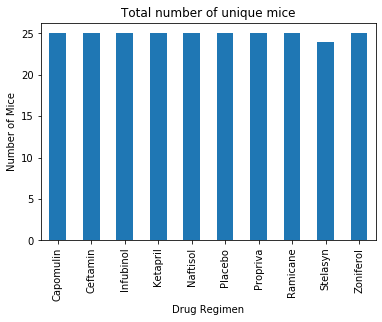

In [20]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.

bar1 = clean.groupby(['Drug Regimen'])['Mouse ID'].nunique()
bar1.plot.bar()
plt.ylabel('Number of Mice')
plt.title( 'Total number of unique mice')

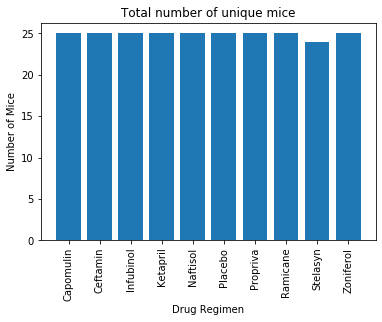

In [21]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.

plt.bar(bar1.index, bar1)
plt.xticks(rotation=90)
plt.ylabel('Number of Mice')
plt.xlabel('Drug Regimen')
plt.title( 'Total number of unique mice')
plt.show()


Text(0.5, 1.0, 'Pie chart of female vs. male')

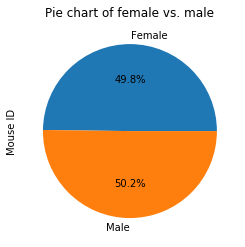

In [26]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

pie1 = clean.groupby(['Sex'])['Mouse ID'].nunique()
pie1.plot.pie(autopct='%1.1f%%')
plt.title('Pie chart of female vs. male')

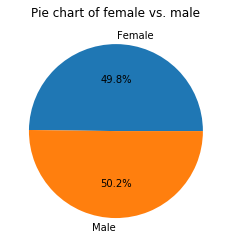

In [25]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

plt.pie(pie1, labels=['Female', 'Male'], autopct='%1.1f%%')
plt.title('Pie chart of female vs. male')
plt.show()

## Quartiles, Outliers and Boxplots

In [28]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


p1 = clean[clean['Drug Regimen']=='Capomulin'].pivot(index='Mouse ID', columns='Timepoint', values='Tumor Volume (mm3)')
Capomulin = pd.DataFrame(p1[45].dropna()).rename(columns={45:'Tumor Volume'})
Capomulin['Drug Regimen']= 'Capomulin'


p2 = clean[clean['Drug Regimen']=='Ramicane'].pivot(index='Mouse ID', columns='Timepoint', values='Tumor Volume (mm3)')
Ramicane = pd.DataFrame(p2[45].dropna()).rename(columns={45:'Tumor Volume'})
Ramicane['Drug Regimen']= 'Ramicane'

p3 = clean[clean['Drug Regimen']=='Infubinol'].pivot(index='Mouse ID', columns='Timepoint', values='Tumor Volume (mm3)')
Infubinol = pd.DataFrame(p3[45].dropna()).rename(columns={45:'Tumor Volume'})
Infubinol['Drug Regimen']= 'Infubinol'

p4 = clean[clean['Drug Regimen']=='Ceftamin'].pivot(index='Mouse ID', columns='Timepoint', values='Tumor Volume (mm3)')
Ceftamin = pd.DataFrame(p4[45].dropna()).rename(columns={45:'Tumor Volume'})
Ceftamin['Drug Regimen']= 'Ceftamin'

Final= pd.concat([Capomulin, Ramicane, Infubinol, Ceftamin ])
Final

,Tumor Volume,Drug Regimen
Mouse ID,,
b128,38.982878,Capomulin
b742,38.939633,Capomulin
g288,37.074024,Capomulin
g316,40.159220,Capomulin
i557,47.685963,Capomulin
...,...,...
w151,67.527482,Ceftamin
x581,64.634949,Ceftamin
x822,61.386660,Ceftamin


In [30]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

Drug = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

out=[]

for i in range (len(Drug)):
    
    D =clean[clean['Drug Regimen']==Drug[i]]
    tumor=D['Tumor Volume (mm3)']
    
    Q1= tumor.quantile(0.25)
    Q3= tumor.quantile(0.75)
    IQR = Q3-Q1
    
    for j in range (len(tumor)):
        
        if tumor.iloc[j] > Q3+1.5*IQR or tumor.iloc[j] < Q1-1.5*IQR:
            out.append(tumor.iloc[j])
        else:
            continue

for k in range (len(out)):
    for n in range (len(clean['Tumor Volume (mm3)'])):
        if clean.iloc[n,2] == out[k]:
            clean.drop(labels = n, axis=0)
            print(n)
        else:
            continue

1698
1699
514


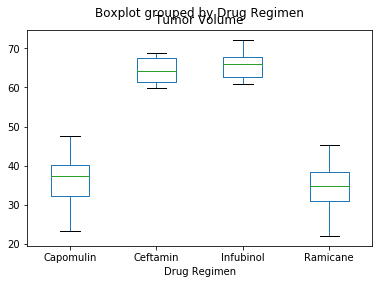

In [31]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

Final.boxplot(by='Drug Regimen', column='Tumor Volume', grid=False)

## Line and Scatter Plots

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


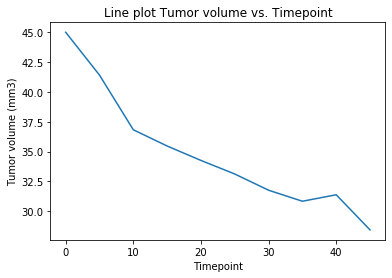

In [32]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

line= clean[clean['Drug Regimen']== 'Capomulin'][clean['Mouse ID']=='m601']
plt.plot(line['Timepoint'], line['Tumor Volume (mm3)'])
plt.title('Line plot Tumor volume vs. Timepoint')
plt.xlabel('Timepoint')
plt.ylabel('Tumor volume (mm3)')
plt.show()


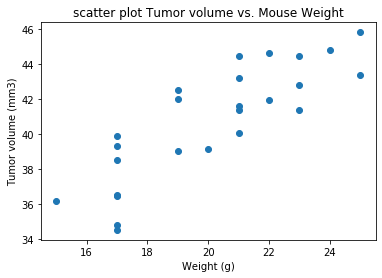

In [33]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

sctr= clean[clean['Drug Regimen']== 'Capomulin']

y =pd.DataFrame(sctr.groupby(['Mouse ID'])['Tumor Volume (mm3)'].mean())
x= pd.DataFrame(sctr.groupby(['Mouse ID'])['Weight (g)'].unique())

plt.scatter(x, y)
plt.title('scatter plot Tumor volume vs. Mouse Weight')
plt.xlabel('Weight (g)')
plt.ylabel('Tumor volume (mm3)')
plt.show()


## Correlation and Regression

Correlation Coefficient=  [[0.95443969]]
Intercept=  [21.55216053]
Mean_Squared_Error=  2.942909921785209


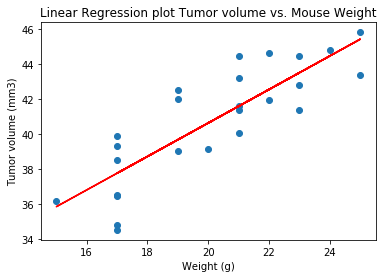

In [34]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

from sklearn import linear_model
reg = linear_model.LinearRegression()
from sklearn.metrics import mean_squared_error

reg.fit(x,y)
yp = reg.predict(x)

coef= reg.coef_
intr= reg.intercept_
mse = mean_squared_error(yp,y)

print('Correlation Coefficient= ', coef)
print('Intercept= ', intr)
print('Mean_Squared_Error= ', mse)


plt.scatter(x, y)
plt.plot(x, yp, 'red')
plt.title('Linear Regression plot Tumor volume vs. Mouse Weight')
plt.xlabel('Weight (g)')
plt.ylabel('Tumor volume (mm3)')
plt.show()